# Turbofan Engine Degradation Simulation
 
Engine degradation simulation was carried out using the Commercial Modular Aero-Propulsion System Simulation (C-MAPSS). 

Four different sets were simulated under different combinations of operational conditions and fault modes. This records several sensor channels to characterize fault evolution. The data set was provided by the NASA Ames Prognostics Center of Excellence (PCoE).

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. 

The columns correspond to:
- unit number
- time, in cycles
- operational setting 1
- operational setting 2
- operational setting 3
- sensor measurement  1
- sensor measurement  2
- ...
- sensor measurement  21



Data Set: FD001 
Train trajectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trajectories: 260
Test trajectories: 259
Conditions: SIX 
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trajectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trajectories: 248
Test trajectories: 249
Conditions: SIX 
Fault Modes: TWO (HPC Degradation, Fan Degradation)

A. Saxena and K. Goebel (2008). “Turbofan Engine Degradation Simulation Data Set”, NASA Prognostics Data Repository, NASA Ames Research Center, Moffett Field, CA

## A selection of papers which use this dataset

Performance Benchmarking and Analysis of Prognostic Methods for CMAPSS Datasets

https://doi.org/10.36001/ijphm.2014.v5i2.2236

Remaining useful life estimation via transformer encoder enhanced by a gated convolutional unit

https://link.springer.com/article/10.1007/s10845-021-01750-x

Variational encoding approach for interpretable assessment of remaining useful life estimation

https://www.sciencedirect.com/science/article/pii/S0951832022000321?via%3Dihub

Exploratory Data Analysis of the N-CMAPSS Dataset for Prognostics

https://ieeexplore.ieee.org/document/9673064







In [1]:
import pandas
import os
import numpy as np
files={'RUL':['RUL_FD001.txt','RUL_FD002.txt','RUL_FD003.txt','RUL_FD004.txt'],
        'test':['test_FD001.txt','test_FD002.txt','test_FD003.txt','test_FD004.txt'],
        'train':['train_FD001.txt','train_FD002.txt','train_FD003.txt','train_FD004.txt']}
tt_header = ['unit number',
             'time',
             'operational setting 1',
             'operational setting 2',
             'operational setting 3',
             'sensor measurement 1',
             'sensor measurement 2',
             'sensor measurement 3',
             'sensor measurement 4',
             'sensor measurement 5',
             'sensor measurement 6',
             'sensor measurement 7',
             'sensor measurement 8',
             'sensor measurement 9',
             'sensor measurement 10',
             'sensor measurement 11',
             'sensor measurement 12',
             'sensor measurement 13',
             'sensor measurement 14',
             'sensor measurement 15',
             'sensor measurement 16',
             'sensor measurement 17',
             'sensor measurement 18',
             'sensor measurement 19',
             'sensor measurement 20',
             'sensor measurement 21']
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
trainingdata = pandas.read_csv(os.path.join('data/CMAPSS',files['train'][0]),sep=' ',names=tt_header, index_col=False)
testingdata = pandas.read_csv(os.path.join('data/CMAPSS',files['test'][0]),sep=' ',names=tt_header, index_col=False)
testrul = pandas.read_csv(os.path.join('data/CMAPSS',files['RUL'][0]),sep=' ',names=['RUL'],index_col=False)



<ipython-input-1-1d1ca83c31d4>:34: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  trainingdata = pandas.read_csv(os.path.join('data/CMAPSS',files['train'][0]),sep=' ',names=tt_header, index_col=False)
<ipython-input-1-1d1ca83c31d4>:35: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  testingdata = pandas.read_csv(os.path.join('data/CMAPSS',files['test'][0]),sep=' ',names=tt_header, index_col=False)


In [2]:
tt_header

['unit number',
 'time',
 'operational setting 1',
 'operational setting 2',
 'operational setting 3',
 'sensor measurement 1',
 'sensor measurement 2',
 'sensor measurement 3',
 'sensor measurement 4',
 'sensor measurement 5',
 'sensor measurement 6',
 'sensor measurement 7',
 'sensor measurement 8',
 'sensor measurement 9',
 'sensor measurement 10',
 'sensor measurement 11',
 'sensor measurement 12',
 'sensor measurement 13',
 'sensor measurement 14',
 'sensor measurement 15',
 'sensor measurement 16',
 'sensor measurement 17',
 'sensor measurement 18',
 'sensor measurement 19',
 'sensor measurement 20',
 'sensor measurement 21']

In [3]:
trainingdata.head()

,unit number,time,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
testingdata.head()

,unit number,time,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [5]:
testrul['RUL'].loc[0]

112

# Remaining Useful Life

In the training data each unit runs until failure.  So the remaining useful life is the maximum cycle time recorded - the current number of cycles

This needs to be calculated and added into the data

In [6]:
units = list(trainingdata['unit number'].unique())

In [7]:
unit_failure_times = {}
for a in units:
    unit_failure_times[a] = max(trainingdata[trainingdata['unit number']==a]['time'])

In [8]:
unit_failure_times

{1: 192,
 2: 287,
 3: 179,
 4: 189,
 5: 269,
 6: 188,
 7: 259,
 8: 150,
 9: 201,
 10: 222,
 11: 240,
 12: 170,
 13: 163,
 14: 180,
 15: 207,
 16: 209,
 17: 276,
 18: 195,
 19: 158,
 20: 234,
 21: 195,
 22: 202,
 23: 168,
 24: 147,
 25: 230,
 26: 199,
 27: 156,
 28: 165,
 29: 163,
 30: 194,
 31: 234,
 32: 191,
 33: 200,
 34: 195,
 35: 181,
 36: 158,
 37: 170,
 38: 194,
 39: 128,
 40: 188,
 41: 216,
 42: 196,
 43: 207,
 44: 192,
 45: 158,
 46: 256,
 47: 214,
 48: 231,
 49: 215,
 50: 198,
 51: 213,
 52: 213,
 53: 195,
 54: 257,
 55: 193,
 56: 275,
 57: 137,
 58: 147,
 59: 231,
 60: 172,
 61: 185,
 62: 180,
 63: 174,
 64: 283,
 65: 153,
 66: 202,
 67: 313,
 68: 199,
 69: 362,
 70: 137,
 71: 208,
 72: 213,
 73: 213,
 74: 166,
 75: 229,
 76: 210,
 77: 154,
 78: 231,
 79: 199,
 80: 185,
 81: 240,
 82: 214,
 83: 293,
 84: 267,
 85: 188,
 86: 278,
 87: 178,
 88: 213,
 89: 217,
 90: 154,
 91: 135,
 92: 341,
 93: 155,
 94: 258,
 95: 283,
 96: 336,
 97: 202,
 98: 156,
 99: 185,
 100: 200}

In [9]:
trainingdata['RUL'] = trainingdata.apply(lambda r: unit_failure_times[r['unit number']] - r['time'],axis=1)

In [10]:
testingdata['RUL'] = trainingdata.apply(lambda r: testrul['RUL'].loc[r['unit number']-1] - r['time'],axis=1)

In [11]:
import matplotlib.pyplot as plt


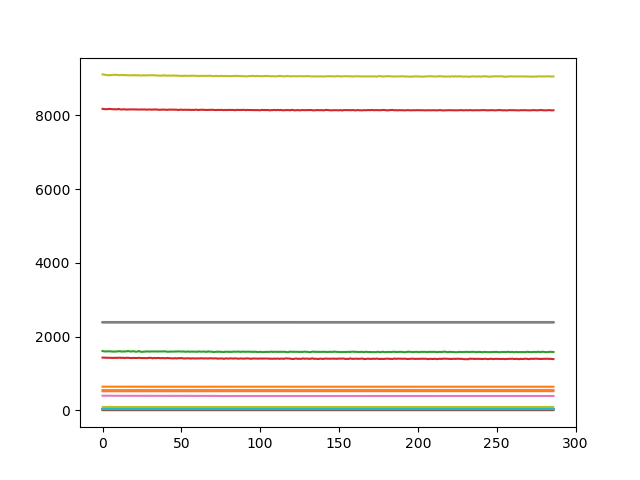

In [12]:
fig, ax = plt.subplots()
unitnumber=2
for a in range(1,21):
    ax.plot(trainingdata[trainingdata['unit number']==unitnumber]['RUL'],
            trainingdata[trainingdata['unit number']==unitnumber]['sensor measurement {}'.format(a)])

plt.show()

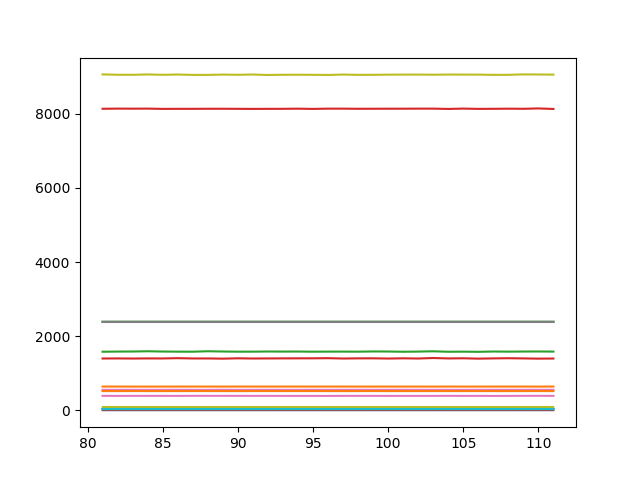

In [13]:
fig, ax = plt.subplots()
unitnumber=1
for a in range(1,21):
    ax.plot(testingdata[testingdata['unit number']==unitnumber]['RUL'],
            testingdata[testingdata['unit number']==unitnumber]['sensor measurement {}'.format(a)])

plt.show()

In [14]:
import sklearn

In [15]:
from sklearn.decomposition import PCA

Our features for training are all the data apart from the unit number, RUL, and time

In [16]:
features = tt_header[2:]

In [17]:
X_train = trainingdata.loc[:,features].values
X_test = testingdata.loc[:,features].values

In [18]:
y_train = trainingdata.loc[:,'RUL'].values
y_test = testingdata.loc[:,'RUL'].values

In [19]:
from sklearn.neural_network import MLPRegressor

In [20]:
y_train

array([191., 190., 189., ...,   2.,   1.,   0.])

In [21]:
regr = MLPRegressor(random_state=1, max_iter=5000000).fit(X_train, y_train)

In [22]:
regr.score(X_test, y_test)

-3.1253788015858204

In [23]:
regr.predict(X_test[:2]),y_train[:2]

(array([118.17752762, 118.92483379]), array([191., 190.]))

Perhaps some preprocessing will help.  Let's scale our data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
trainSamples = len(X_train)
testSamples = len(X_test)

In [26]:
alldata = np.concatenate([X_train,X_test])
alldata_s = StandardScaler().fit_transform(alldata)
X_train_s = alldata_s[:trainSamples]
X_test_s = alldata_s[trainSamples:]
assert len(X_train_s) == trainSamples
assert len(X_test_s) == testSamples

Let's try that again using our scaled data

In [27]:
regr_s = MLPRegressor(random_state=1, max_iter=5000000).fit(X_train_s, y_train)

In [28]:
regr_s.score(X_test_s, y_test)

-5.322596322179322

In [29]:
regr.predict(X_test_s[:2]),y_train[:2]

(array([0.51654748, 6.76326499]), array([191., 190.]))

In [46]:


scaled_x = pandas.DataFrame(data = X_train_s, columns = features)
scaled_x['RUL'] = list(trainingdata['RUL'].copy())
scaled_x['unit number'] = list(trainingdata['unit number'].copy())
scaled_x['time'] = list(trainingdata['time'].copy())

In [47]:
pca = PCA(n_components='mle')

In [48]:
principalComponents = pca.fit_transform(X_train_s)

In [49]:
principalDf = pandas.DataFrame(data = principalComponents)

In [50]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-3.152964,-0.479149,-1.226874,-0.636533,-0.340694,0.855373,0.649830,-0.402061,0.015938,0.684694,0.270186,0.222167,-0.175713,-0.573010,0.706737,-0.419826,0.411200
1,-2.543059,-0.908035,-0.181829,-1.300910,-0.295766,1.025329,0.317666,-0.041761,-0.352591,0.690124,0.073045,-0.223332,-0.097132,0.141090,-0.403716,-0.766371,0.190795
2,-3.184301,-0.582124,-0.529744,2.140282,-0.172342,0.598893,-1.209562,-0.432954,0.268129,0.105313,-0.175648,0.279368,-0.094097,0.815972,0.217704,-0.056136,-0.082373
3,-3.624378,-0.867489,0.222111,-0.228718,-0.286412,-0.425680,-0.054853,0.127707,-0.092122,-1.187341,0.395469,0.748234,0.749393,1.338428,-0.163372,0.220791,0.065693
4,-2.595000,-0.406233,-1.058248,0.199327,-0.298029,-0.770849,0.377885,0.055080,-0.521355,0.225626,-0.184971,0.091075,-0.360303,0.548188,-0.046044,0.097297,-0.129079


In [62]:
principalDf['RUL'] = list(trainingdata['RUL'].copy())
principalDf['unit number'] = list(trainingdata['unit number'].copy())
principalDf['time'] = list(trainingdata['time'].copy())

In [63]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,RUL,unit number,time
0,-3.152964,-0.479149,-1.226874,-0.636533,-0.340694,0.855373,0.649830,-0.402061,0.015938,0.684694,0.270186,0.222167,-0.175713,-0.573010,0.706737,-0.419826,0.411200,191.0,1,1
1,-2.543059,-0.908035,-0.181829,-1.300910,-0.295766,1.025329,0.317666,-0.041761,-0.352591,0.690124,0.073045,-0.223332,-0.097132,0.141090,-0.403716,-0.766371,0.190795,190.0,1,2
2,-3.184301,-0.582124,-0.529744,2.140282,-0.172342,0.598893,-1.209562,-0.432954,0.268129,0.105313,-0.175648,0.279368,-0.094097,0.815972,0.217704,-0.056136,-0.082373,189.0,1,3
3,-3.624378,-0.867489,0.222111,-0.228718,-0.286412,-0.425680,-0.054853,0.127707,-0.092122,-1.187341,0.395469,0.748234,0.749393,1.338428,-0.163372,0.220791,0.065693,188.0,1,4
4,-2.595000,-0.406233,-1.058248,0.199327,-0.298029,-0.770849,0.377885,0.055080,-0.521355,0.225626,-0.184971,0.091075,-0.360303,0.548188,-0.046044,0.097297,-0.129079,187.0,1,5


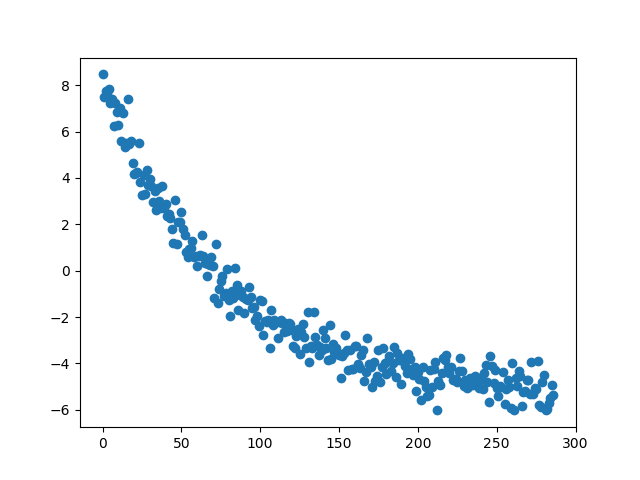

In [53]:
fig, ax = plt.subplots()
unitnumber=2
ax.scatter(principalDf[principalDf['unit number']==unitnumber]['RUL'],
            principalDf[principalDf['unit number']==unitnumber][0])

plt.show()

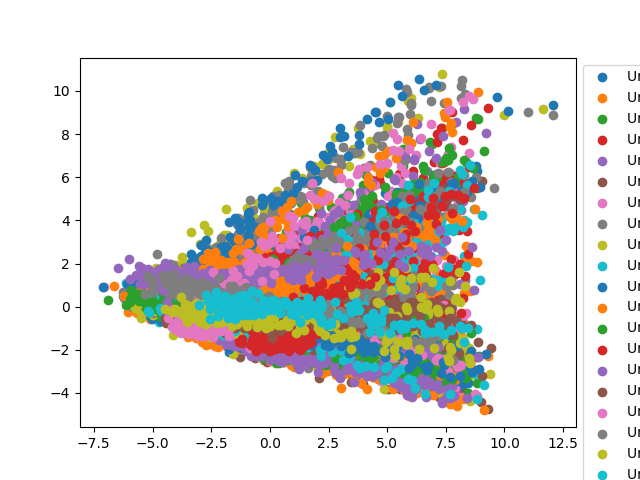

In [54]:
fig, ax = plt.subplots()
for a in principalDf['unit number'].unique():
    ax.scatter(principalDf[principalDf['unit number']==a][0],
                principalDf[principalDf['unit number']==a][1],label='Unit {}'.format(a))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

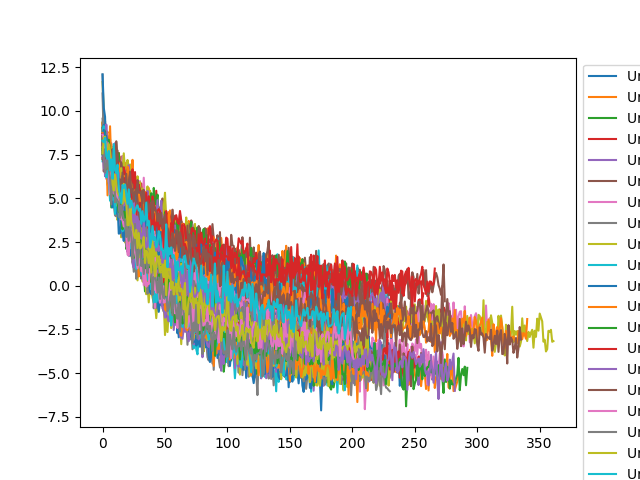

In [55]:
fig, ax = plt.subplots()
for a in principalDf['unit number'].unique():
    ax.plot(principalDf[principalDf['unit number']==a]['RUL'],
                principalDf[principalDf['unit number']==a][0],label='Unit {}'.format(a))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

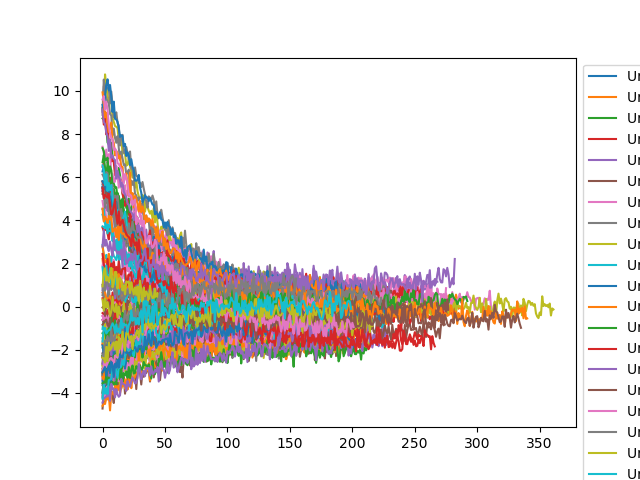

In [56]:
fig, ax = plt.subplots()
for a in principalDf['unit number'].unique():
    ax.plot(principalDf[principalDf['unit number']==a]['RUL'],
                principalDf[principalDf['unit number']==a][1],label='Unit {}'.format(a))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [57]:
pca.explained_variance_ratio_

array([0.53501097, 0.1457787 , 0.05298612, 0.05179521, 0.04247769,
       0.02401868, 0.02154331, 0.02040424, 0.0180712 , 0.01712107,
       0.01521653, 0.01224059, 0.01177048, 0.01047961, 0.0102188 ,
       0.00878205, 0.00208475])

Let's find all the data younger than 20 samples and call them young.  Then find all the samples within 20 cycles of failure and call them old.  Perhaps we can more clearly see distinct features we can use to classify them and then predict remaining useful life.

In [64]:
young = principalDf[principalDf['time']<=20]

In [65]:
old = principalDf[principalDf['RUL']<=20]

In [72]:
middleaged = principalDf[(principalDf['RUL']>20) & (principalDf['time']>20)]

In [66]:
young.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,RUL,unit number,time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-2.393200,-0.305135,0.006379,-0.030971,0.073949,-0.004816,0.002846,0.020001,-0.007613,0.014715,-0.008915,0.005886,0.019955,0.019141,0.010445,0.015085,0.001431,195.810000,50.500000,10.500000
std,1.879703,0.875348,1.003386,1.007341,1.385418,0.675566,0.635514,0.630393,0.594231,0.579848,0.532816,0.470827,0.457835,0.446643,0.447714,0.409028,0.199534,46.481224,28.873289,5.767723
min,-7.131014,-2.480482,-2.996125,-2.727181,-0.605307,-2.580461,-2.098837,-1.962222,-1.983068,-1.931110,-1.966370,-1.689554,-1.529414,-1.768632,-1.397217,-1.482320,-0.797717,108.000000,1.000000,1.000000
25%,-4.068673,-1.004622,-0.695448,-0.767854,-0.335776,-0.457453,-0.446855,-0.422150,-0.401646,-0.382558,-0.359412,-0.307503,-0.277060,-0.258972,-0.269751,-0.259766,-0.132849,165.000000,25.750000,5.750000
50%,-2.333856,-0.229361,-0.006162,-0.031639,-0.227880,0.006011,0.007964,0.022123,-0.014462,0.012093,-0.001855,0.008703,0.005201,0.017563,0.003955,0.003863,0.001082,188.500000,50.500000,10.500000
75%,-0.801398,0.393409,0.733970,0.681969,-0.114945,0.465019,0.439793,0.438279,0.384845,0.380139,0.343168,0.312294,0.311211,0.319691,0.315371,0.275225,0.133093,215.000000,75.250000,15.250000
max,2.018018,2.210022,3.140987,3.176446,6.430929,2.521431,2.042745,2.164538,2.020739,1.948801,2.260438,1.596754,1.993405,1.467129,1.702115,1.382386,0.626454,361.000000,100.000000,20.000000


In [67]:
old.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,RUL,unit number,time
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,6.206108,0.890823,0.005558,-0.020714,0.162927,-0.027338,-0.024477,-0.029551,0.010447,0.050576,0.065101,0.019767,0.046846,-0.011251,0.007212,-0.003401,-0.003115,10.000000,50.500000,196.310000
std,1.391706,3.583877,1.028592,0.973914,0.147698,0.672554,0.619720,0.616496,0.584498,0.555921,0.572725,0.522755,0.584474,0.460112,0.448945,0.423495,0.198494,6.056743,28.872945,46.517427
min,1.783243,-4.810117,-3.372643,-3.325493,-0.355214,-2.550418,-2.009817,-2.099434,-1.969591,-1.770805,-1.749068,-1.583894,-1.579628,-1.736398,-1.237977,-1.321055,-0.609381,0.000000,1.000000,108.000000
25%,5.257436,-2.134528,-0.711283,-0.688151,0.062214,-0.487166,-0.438402,-0.440592,-0.392504,-0.322692,-0.308260,-0.310364,-0.301412,-0.318274,-0.293436,-0.279659,-0.134789,5.000000,25.750000,165.000000
50%,6.243986,-0.166008,0.019104,-0.035283,0.170044,-0.031308,-0.024286,-0.017113,0.027606,0.043275,0.040878,0.005245,0.027286,-0.018660,0.001462,0.006229,0.000267,10.000000,50.500000,189.000000
75%,7.226867,3.942803,0.724300,0.619097,0.273740,0.431495,0.389779,0.381875,0.411207,0.410803,0.420653,0.314379,0.355795,0.286209,0.316309,0.274875,0.130358,15.000000,75.250000,215.000000
max,12.087607,10.768050,3.261036,3.156900,0.545959,2.666911,2.134668,2.078174,2.073548,2.031521,3.771854,4.379336,6.756723,2.833894,1.598343,2.147384,0.835894,20.000000,100.000000,362.000000


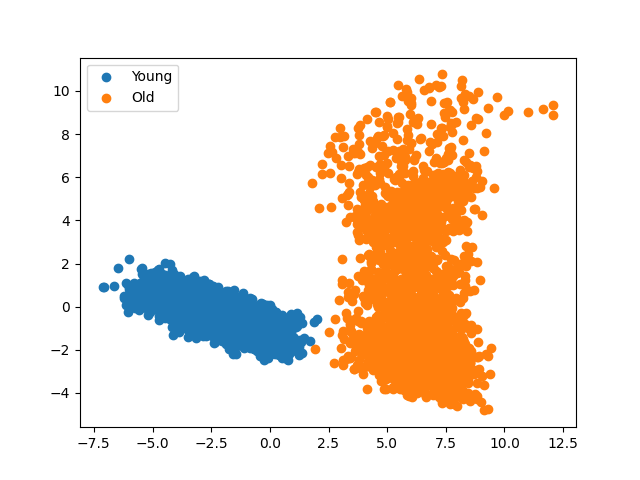

In [77]:
fig, ax = plt.subplots()
ax.scatter(young[0],young[1],label='Young')
# ax.scatter(middleaged[0],middleaged[1],label='Middle aged')
ax.scatter(old[0],old[1],label='Old')  
plt.legend()
plt.show()